In [1]:
#!pip install nba_api
#!pip install altair
#!pip install altair_saver
#!pip install selenium

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from nba_api.stats.static import teams, players
import altair as alt
from altair_saver import save as alt_save

pd.set_option('max_columns', 120)
pd.set_option('max_rows', 30)

/home/noone/.virtualenvs/env36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_pickle('../active_players_seasons_stats.pickle.zip', compression='zip')
print(df.shape)
df.head()

(3037, 27)


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203500,2013-14,00,1610612760,OKC,20.0,81,20,1197.0,93,185,0.503,0,0,0.0,79,136,0.581,142,190,332,43,40,57,71,203,265
1,203500,2014-15,00,1610612760,OKC,21.0,70,67,1771.0,217,399,0.544,0,2,0.0,103,205,0.502,199,324,523,66,38,86,99,222,537
2,203500,2015-16,00,1610612760,OKC,22.0,80,80,2014.0,261,426,0.613,0,0,0.0,114,196,0.582,219,314,533,62,42,89,84,223,636
3,203500,2016-17,00,1610612760,OKC,23.0,80,80,2389.0,374,655,0.571,0,1,0.0,157,257,0.611,281,332,613,86,89,78,146,195,905
4,203500,2017-18,00,1610612760,OKC,24.0,76,76,2487.0,448,712,0.629,0,2,0.0,160,286,0.559,384,301,685,88,92,78,128,215,1056


In [4]:
active_players = pd.DataFrame(players.get_active_players())
active_teams = pd.DataFrame(teams.get_teams())
print(active_players.shape, active_teams.shape)
active_players.head()

(519, 5) (30, 7)


,id,full_name,first_name,last_name,is_active
0,203500,Steven Adams,Steven,Adams,True
1,1628389,Bam Adebayo,Bam,Adebayo,True
2,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
3,1629734,Kyle Alexander,Kyle,Alexander,True
4,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True


In [5]:
df = pd.merge(df, active_players, left_on='PLAYER_ID', right_on='id')
df.sort_values(['PLAYER_ID', 'SEASON_ID', 'GP'], ascending=[True, True, False], inplace=True)
df.drop_duplicates(subset=['PLAYER_ID', 'SEASON_ID'], keep='first', inplace=True)
print(df.shape)
df.head()

(2555, 32)


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active
487,1713,1998-99,00,1610612761,TOR,22.0,50,49,1760.0,345,766,0.450,19,66,0.288,204,268,0.761,94,189,283,149,55,77,110,140,913,1713,Vince Carter,Vince,Carter,True
488,1713,1999-00,00,1610612761,TOR,23.0,82,82,3126.0,788,1696,0.465,95,236,0.403,436,551,0.791,150,326,476,322,110,92,178,263,2107,1713,Vince Carter,Vince,Carter,True
489,1713,2000-01,00,1610612761,TOR,24.0,75,75,2980.0,762,1656,0.460,162,397,0.408,384,502,0.765,176,240,416,291,114,82,167,205,2070,1713,Vince Carter,Vince,Carter,True
490,1713,2001-02,00,1610612761,TOR,25.0,60,60,2386.0,559,1307,0.428,121,313,0.387,245,307,0.798,138,175,313,239,94,43,154,191,1484,1713,Vince Carter,Vince,Carter,True
491,1713,2002-03,00,1610612761,TOR,26.0,43,42,1470.0,355,760,0.467,45,131,0.344,129,160,0.806,59,129,188,143,48,41,74,121,884,1713,Vince Carter,Vince,Carter,True


1. самое сильное изменение процента штрафных после предыдущего сезона
2. у кого изменился процент штрафных 
3. у кого на самом деле нет
4. график количество Vs процент

In [6]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'id', 'full_name', 'first_name', 'last_name',
       'is_active'],
      dtype='object')

In [7]:
df.groupby('full_name').SEASON_ID.count().sort_values(ascending=False).head(10)

full_name
Vince Carter       22
Tyson Chandler     19
Kyle Korver        17
Udonis Haslem      17
Carmelo Anthony    17
Nene               17
LeBron James       17
Dwight Howard      16
Andre Iguodala     16
Trevor Ariza       16
Name: SEASON_ID, dtype: int64

In [8]:
df.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active
2734,1629744,2019-20,00,1610612761,TOR,25.0,33,0,321.0,54,111,0.486,35,75,0.467,7,10,0.700,7,41,48,17,8,0,12,31,150,1629744,Matt Thomas,Matt,Thomas,True
2283,1629745,2019-20,00,1610612756,PHX,25.0,3,0,15.0,1,5,0.200,0,2,0.000,2,2,1.000,2,1,3,0,1,0,0,1,4,1629745,Tariq Owens,Tariq,Owens,True
1152,1629750,2019-20,00,1610612738,BOS,26.0,44,1,414.0,49,98,0.500,6,23,0.261,23,36,0.639,18,62,80,23,23,7,18,37,127,1629750,Javonte Green,Javonte,Green,True
2095,1629752,2019-20,00,1610612762,UTA,23.0,16,0,74.0,9,17,0.529,1,5,0.200,0,0,0.000,5,14,19,2,0,1,3,7,19,1629752,Juwan Morgan,Juwan,Morgan,True
2084,1629760,2019-20,00,1610612739,CLE,23.0,4,0,19.0,1,4,0.250,0,2,0.000,0,0,0.000,0,3,3,1,2,1,0,1,2,1629760,Matt Mooney,Matt,Mooney,True


In [74]:
df['FT_PCT_DIFF'] = df.groupby('PLAYER_ID').FT_PCT.diff()
for col in ['FT_PCT', 'FTA', 'FTM']:
    df[f'{col}_PREV'] = df.groupby('PLAYER_ID')[col].shift()

df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV,FTM_PREV
487,1713,1998-99,00,1610612761,TOR,22.0,50,49,1760.0,345,766,0.450,19,66,0.288,204,268,0.761,94,189,283,149,55,77,110,140,913,1713,Vince Carter,Vince,Carter,True,NaN,NaN,NaN,NaN
488,1713,1999-00,00,1610612761,TOR,23.0,82,82,3126.0,788,1696,0.465,95,236,0.403,436,551,0.791,150,326,476,322,110,92,178,263,2107,1713,Vince Carter,Vince,Carter,True,0.030,0.761,268,204
489,1713,2000-01,00,1610612761,TOR,24.0,75,75,2980.0,762,1656,0.460,162,397,0.408,384,502,0.765,176,240,416,291,114,82,167,205,2070,1713,Vince Carter,Vince,Carter,True,-0.026,0.791,551,436
490,1713,2001-02,00,1610612761,TOR,25.0,60,60,2386.0,559,1307,0.428,121,313,0.387,245,307,0.798,138,175,313,239,94,43,154,191,1484,1713,Vince Carter,Vince,Carter,True,0.033,0.765,502,384
491,1713,2002-03,00,1610612761,TOR,26.0,43,42,1470.0,355,760,0.467,45,131,0.344,129,160,0.806,59,129,188,143,48,41,74,121,884,1713,Vince Carter,Vince,Carter,True,0.008,0.798,307,245


In [10]:
idx = df.FT_PCT_DIFF.idxmax()
df.iloc[idx-2: idx+2]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV
1749,1627774,2018-19,00,1610612757,POR,25.0,71,33,1327.0,216,424,0.509,59,181,0.326,50,71,0.704,56,161,217,53,31,30,46,116,541,1627774,Jake Layman,Jake,Layman,True,0.037,0.667,3
1750,1627774,2019-20,00,1610612750,MIN,26.0,23,2,505.0,81,179,0.453,24,72,0.333,24,32,0.750,17,40,57,15,17,10,24,47,210,1627774,Jake Layman,Jake,Layman,True,0.046,0.704,71
1940,1627775,2016-17,00,1610612744,GSW,21.0,71,20,1074.0,106,245,0.433,41,123,0.333,29,37,0.784,21,79,100,77,32,15,36,62,282,1627775,Patrick McCaw,Patrick,McCaw,True,NaN,NaN,NaN
1941,1627775,2017-18,00,1610612744,GSW,22.0,57,10,961.0,92,225,0.409,19,80,0.238,26,34,0.765,16,66,82,81,43,10,41,67,229,1627775,Patrick McCaw,Patrick,McCaw,True,-0.019,0.784,37


In [11]:
thresh = 50
(df
 .query(f'FTA > {thresh} and FTA_PREV > {thresh}')
 .sort_values('FT_PCT_DIFF', ascending=False)
 .tail(10))

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV
1471,101141,2014-15,00,1610612749,MIL,28.0,58,36,1319.0,263,557,0.472,74,190,0.389,69,107,0.645,80,197,277,56,36,19,45,149,669,101141,Ersan Ilyasova,Ersan,Ilyasova,True,-0.178,0.823,130
2026,101139,2009-10,00,1610612762,UTA,23.0,63,28,1497.0,241,562,0.429,74,217,0.341,66,95,0.695,42,126,168,105,58,17,81,190,622,101139,CJ Miles,CJ,Miles,True,-0.181,0.876,89
1570,201949,2014-15,00,1610612761,TOR,28.0,70,17,1370.0,238,404,0.589,11,51,0.216,67,102,0.657,61,196,257,95,54,70,79,155,554,201949,James Johnson,James,Johnson,True,-0.187,0.844,90
2455,203460,2016-17,00,1610612760,OKC,25.0,79,79,2376.0,215,463,0.464,45,184,0.245,47,111,0.423,98,305,403,79,94,79,51,204,522,203460,Andre Roberson,Andre,Roberson,True,-0.188,0.611,54
3009,201152,2012-13,00,1610612755,PHI,25.0,76,76,2629.0,509,958,0.531,1,8,0.125,108,188,0.574,182,389,571,125,133,55,90,191,1127,201152,Thaddeus Young,Thaddeus,Young,True,-0.197,0.771,144
524,203487,2018-19,00,0,TOT,27.0,28,1,372.0,46,123,0.374,10,38,0.263,32,53,0.604,19,51,70,70,20,15,20,48,134,203487,Michael Carter-Williams,Michael,Carter-Williams,True,-0.216,0.820,89
2487,200765,2014-15,00,0,TOT,29.0,68,68,2019.0,275,645,0.426,27,86,0.314,31,78,0.397,73,300,373,538,91,7,210,153,608,200765,Rajon Rondo,Rajon,Rondo,True,-0.230,0.627,67
2929,202355,2018-19,00,1610612748,MIA,30.0,72,53,1674.0,388,680,0.571,2,16,0.125,109,243,0.449,257,560,817,56,46,136,97,192,887,202355,Hassan Whiteside,Hassan,Whiteside,True,-0.254,0.703,182
2885,1627820,2018-19,00,1610612746,LAC,25.0,62,0,628.0,92,217,0.424,4,19,0.211,30,57,0.526,20,81,101,42,21,7,36,83,218,1627820,Tyrone Wallace,Tyrone,Wallace,True,-0.256,0.782,78
1893,101133,2014-15,00,1610612754,IND,28.0,61,6,1146.0,117,212,0.552,0,0,0.000,31,102,0.304,105,251,356,33,30,46,59,172,265,101133,Ian Mahinmi,Ian,Mahinmi,True,-0.317,0.621,145


In [12]:
df.PLAYER_ID.nunique()

514

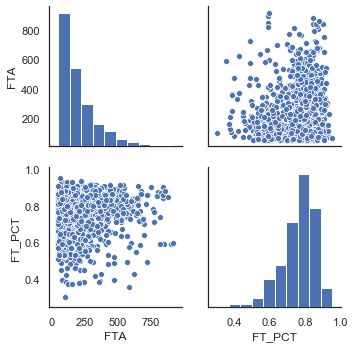

In [13]:
sns.pairplot(df.query(f'FTA > {thresh}')[['FTA', 'FT_PCT']].apply(pd.to_numeric))

1. тренд по сезонам
2. кто больше всех бросает\попадает\промахивается

# 2019-2020 season totals

In [14]:
this_season = df.query('SEASON_ID == "2019-20"').copy()
print(this_season.shape)

(502, 35)


In [15]:
fta, ftm = this_season[['FTA', 'FTM']].sum().astype(int)
print(fta, ftm, ftm / fta * 100)

44429 34254 77.09829165635058


In [16]:
(this_season.FTA > 0).value_counts()

True     471
False     31
Name: FTA, dtype: int64

In [17]:
this_season.FT_PCT[this_season.FTA > 0].mean()

0.7401804670912957

# FTA Vs FT_PCT 

In [18]:
subdf = df.query(f'FTA > {thresh} and SEASON_ID == "2019-20"')
print(len(subdf))

266


In [19]:
subdf.sort_values('FT_PCT').tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV
2458,1629130,2019-20,00,1610612748,MIA,26.0,65,60,1949.0,286,613,0.467,243,543,0.448,48,53,0.906,9,203,212,91,35,15,60,179,863,1629130,Duncan Robinson,Duncan,Robinson,True,0.239,0.667,6
2021,203114,2019-20,00,1610612749,MIL,28.0,55,52,1653.0,424,850,0.499,133,318,0.418,178,196,0.908,40,301,341,225,51,7,113,122,1159,203114,Khris Middleton,Khris,Middleton,True,0.071,0.837,258
340,1626164,2019-20,00,1610612756,PHX,23.0,62,62,2241.0,544,1118,0.487,126,350,0.360,405,442,0.916,27,231,258,408,45,16,244,188,1619,1626164,Devin Booker,Devin,Booker,True,0.050,0.866,454
1502,202681,2019-20,00,1610612751,BKN,28.0,20,20,658.0,199,416,0.478,56,142,0.394,94,102,0.922,22,81,103,128,27,10,52,53,548,202681,Kyrie Irving,Kyrie,Irving,True,0.049,0.873,245
2892,202954,2019-20,00,1610612738,BOS,30.0,63,1,1215.0,136,318,0.428,33,90,0.367,108,116,0.931,19,105,124,158,52,12,70,120,413,202954,Brad Wanamaker,Brad,Wanamaker,True,0.074,0.857,28


In [20]:
add_label = ['LeBron James', 'Dwight Howard', 'Russell Westbrook', 'James Harden', 'DeMar DeRozan', 'Kyrie Irving', 
             'Kawhi Leonard', 'Jimmy Butler', 'Anthony Davis', 'Damian Lillard', 'Andre Drummond', 
             'Rudy Gobert', 'Steven Adams', 'Giannis Antetokounmpo', 'Spencer Dinwiddie', 'Joel Embiid', 'Clint Capela', 
             'Devin Booker', 'Trae Young', 'Luka Doncic', ]
top_label = ['Brad Wanamaker', 'Jarrett Culver']

In [21]:
tt = alt.Chart(subdf, mark='point', height=650, width=1000)
points = tt.encode(x='FTA', y='FT_PCT')

text = alt.Chart(subdf[subdf.full_name.isin(add_label)]#.query('FTA > 330 or FT_PCT < .6 or FT_PCT > .93')
                 , mark='text').mark_text(
    angle=360-15,
    align='left',
    baseline='middle',
    dx=7, 
    size=15
).encode(
    x=alt.X('FTA', title='Пробито штрафных'), 
    y=alt.Y('FT_PCT', title='Процент попадания штрафных', scale=alt.Scale(zero=False)),
    text='full_name'
)

text_top = alt.Chart(subdf[subdf.full_name.isin(top_label)]
                 , mark='text').mark_text(
    angle=360-35,
    align='left',
    baseline='middle',
    dx=7, 
    color='red', 
    size=15
).encode(
    x='FTA', y='FT_PCT',
    text='full_name'
)

chart = (points + text + text_top).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)
#alt_save(chart, 'fta_vs_ft_pct_.png')
chart

alt.LayerChart(...)

In [22]:
alt.Chart(df.query(f'SEASON_ID == "2019-20"'), mark='bar').encode(
    alt.X("FTA:Q", bin=True, title='Сколько раз игрок бросал штрафные в сезоне 2019-2020'),
    alt.Y(aggregate='count', type='quantitative', title='Сколько таких игроков'),
)

alt.Chart(...)

# last 5 seasons

In [23]:
bigmans = ['Dwight Howard', 'Anthony Davis', 'Andre Drummond', 
             'Rudy Gobert', 'Steven Adams', 'Joel Embiid']
guards = ['Russell Westbrook', 'James Harden', 'DeMar DeRozan', 'Kyrie Irving', 
        'Damian Lillard', 'Stephen Curry']
forwards = ['LeBron James', 'Kawhi Leonard', 'Giannis Antetokounmpo', 'Kevin Durant']

In [24]:
hist = df[(df.full_name.isin(bigmans)) & (df.SEASON_ID >= '2015-16')].copy()
hist.sort_values(['full_name', 'SEASON_ID'], inplace=True)
print(len(hist), hist.full_name.nunique(), hist.SEASON_ID.nunique())

29 6 5


In [25]:
def plot_hist(hist):
    tt = alt.Chart(hist, height=400, width=600)
    lines = tt.mark_line().encode(x='SEASON_ID:N', y='FT_PCT', 
                       color='full_name:N', 
                      )

    points = tt.mark_point(filled=True).encode(x='SEASON_ID:N', y='FT_PCT', 
                       color=alt.Color('full_name:N', legend=None), 
                       size=alt.Size('FTA:Q', scale=alt.Scale(range=[50, 800]), 
                                     title='Пробито штрафных', legend=alt.Legend(orient="left"))
                      )


    text = alt.Chart(hist.groupby('full_name')[['SEASON_ID', 'FT_PCT']].last().reset_index(),
                     mark='text').mark_text(
        angle=360-15,
        align='left',
        baseline='middle',
        dx=7, 
        size=15
    ).encode(
        x=alt.X('SEASON_ID:N', title='Сезон'), 
        y=alt.Y('FT_PCT', title='Процент попадания штрафных', scale=alt.Scale(zero=False)),
        text='full_name'
    )


    return (lines + points + text).configure_axis(
        labelFontSize=15,
        titleFontSize=15
    )

plot_hist(hist)

alt.LayerChart(...)

In [26]:
hist = df[(df.full_name.isin(guards)) & (df.SEASON_ID >= '2015-16')].copy()
hist.sort_values(['full_name', 'SEASON_ID'], inplace=True)
print(len(hist), hist.full_name.nunique(), hist.SEASON_ID.nunique())
plot_hist(hist)

30 6 5


alt.LayerChart(...)

In [27]:
hist = df[(df.full_name.isin(forwards)) & (df.SEASON_ID >= '2015-16')].copy()
hist.sort_values(['full_name', 'SEASON_ID'], inplace=True)
print(len(hist), hist.full_name.nunique(), hist.SEASON_ID.nunique())
plot_hist(hist)

19 4 5


alt.LayerChart(...)

In [36]:
df.query(f'full_name == "{guards[-1]}"')

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV
694,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,1143,0.462,166,380,0.437,177,200,0.885,48,308,356,472,152,19,243,252,1399,201939,Stephen Curry,Stephen,Curry,True,NaN,NaN,NaN
695,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,1053,0.480,151,342,0.442,212,227,0.934,52,234,286,432,109,20,226,233,1373,201939,Stephen Curry,Stephen,Curry,True,0.049,0.885,200
696,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,296,0.490,55,121,0.455,38,47,0.809,15,73,88,138,39,8,65,62,383,201939,Stephen Curry,Stephen,Curry,True,-0.125,0.934,227
697,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,1388,0.451,272,600,0.453,262,291,0.900,59,255,314,539,126,12,240,198,1786,201939,Stephen Curry,Stephen,Curry,True,0.091,0.809,47
698,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,1383,0.471,261,615,0.424,308,348,0.885,46,288,334,666,128,14,294,194,1873,201939,Stephen Curry,Stephen,Curry,True,-0.015,0.900,291
699,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,1341,0.487,286,646,0.443,308,337,0.914,56,285,341,619,163,16,249,158,1900,201939,Stephen Curry,Stephen,Curry,True,0.029,0.885,348
700,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,1598,0.504,402,886,0.454,363,400,0.908,68,362,430,527,169,15,262,161,2375,201939,Stephen Curry,Stephen,Curry,True,-0.006,0.914,337
701,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,1443,0.468,324,789,0.411,325,362,0.898,61,292,353,524,142,17,239,183,1999,201939,Stephen Curry,Stephen,Curry,True,-0.010,0.908,400
702,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,864,0.495,212,501,0.423,278,302,0.921,36,225,261,310,80,8,153,114,1346,201939,Stephen Curry,Stephen,Curry,True,0.023,0.898,362
703,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,1340,0.472,354,810,0.437,263,287,0.916,45,324,369,361,92,25,192,166,1881,201939,Stephen Curry,Stephen,Curry,True,-0.005,0.921,302


# significance of change

In [44]:
hist = df[(df.full_name.isin(['Stephen Curry'])) & (df.SEASON_ID >= '2015-16')].copy()
hist.sort_values(['full_name', 'SEASON_ID'], inplace=True)
print(len(hist), hist.full_name.nunique(), hist.SEASON_ID.nunique())
plot_hist(hist)

5 1 5


alt.LayerChart(...)

In [45]:
hist = df[(df.full_name.isin(['Andre Drummond'])) & (df.SEASON_ID >= '2015-16')].copy()
hist.sort_values(['full_name', 'SEASON_ID'], inplace=True)
print(len(hist), hist.full_name.nunique(), hist.SEASON_ID.nunique())
plot_hist(hist)

5 1 5


alt.LayerChart(...)

In [28]:
import scipy.stats as sstats
from statsmodels.stats import proportion

In [29]:
hist = df[(df.full_name.isin(['Stephen Curry'])) & (df.SEASON_ID >= '2018-19')].copy()
hist['FTF'] = hist.FTA - hist.FTM
hist

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV,FTF
703,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,1340,0.472,354,810,0.437,263,287,0.916,45,324,369,361,92,25,192,166,1881,201939,Stephen Curry,Stephen,Curry,True,-0.005,0.921,302,24
704,201939,2019-20,00,1610612744,GSW,32.0,5,5,139.0,33,82,0.402,12,49,0.245,26,26,1.000,4,22,26,33,5,2,16,11,104,201939,Stephen Curry,Stephen,Curry,True,0.084,0.916,287,0


In [30]:
cont_table = (hist[['SEASON_ID', 'FTA', 'FTM']]
              .set_index('SEASON_ID')
#               .unstack()
             )
cont_table

,FTA,FTM
SEASON_ID,,
2018-19,287,263
2019-20,26,26


In [75]:
_count = list(cont_table.FTM)
_nobs = list(cont_table.FTA)
print(_count, _nobs)
proportion.proportions_ztest(_count, _nobs, alternative='two-sided')

[263, 26] [287, 26]


(-1.534527210672138, 0.12490000434133158)

проверка на применимость двухвыборочного Z-теста пропоций

$$np \ge 5, n(1-p) \ge 5$$ 

In [53]:
_p = _count[0] / _nobs[0]
_n = _nobs[1]
print(_n, _p)
_n * _p , _n * (1 - _p)

26 0.9163763066202091


(23.825783972125436, 2.174216027874564)

In [117]:
def do_proportions_ztest(row, pvalue=0.05):
    _count = [row['FTM_PREV'], row['FTM']]
    _nobs = [row['FTA_PREV'], row['FTA']]
    _stat, _pval = proportion.proportions_ztest(_count, _nobs, alternative='two-sided')
    sign = _pval < pvalue
    return pd.Series({'z_stat': _stat, 'z_pval':_pval, 'significant': sign})

player_df = df[df.full_name.isin(['Stephen Curry', 'Andre Drummond'])].copy()
player_df[['z_stat', 'z_pval', 'significant']] = player_df.apply(do_proportions_ztest, axis=1)
player_df.head(4)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,first_name,last_name,is_active,FT_PCT_DIFF,FT_PCT_PREV,FTA_PREV,FTM_PREV,z_stat,z_pval,significant
694,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,1143,0.462,166,380,0.437,177,200,0.885,48,308,356,472,152,19,243,252,1399,201939,Stephen Curry,Stephen,Curry,True,NaN,NaN,NaN,NaN,NaN,NaN,False
695,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,1053,0.480,151,342,0.442,212,227,0.934,52,234,286,432,109,20,226,233,1373,201939,Stephen Curry,Stephen,Curry,True,0.049,0.885,200,177,-1.771609,0.076459,False
696,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,296,0.490,55,121,0.455,38,47,0.809,15,73,88,138,39,8,65,62,383,201939,Stephen Curry,Stephen,Curry,True,-0.125,0.934,227,212,2.768177,0.005637,True
697,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,1388,0.451,272,600,0.453,262,291,0.900,59,255,314,539,126,12,240,198,1786,201939,Stephen Curry,Stephen,Curry,True,0.091,0.809,47,38,-1.849269,0.064419,False


In [114]:
def plot_hist_with_sign(hist):
    tt = alt.Chart(hist, height=400, width=600)
    lines = tt.mark_line().encode(x='SEASON_ID:N', y='FT_PCT', 
                       color='full_name:N', 
                      )

    points = tt.mark_point(filled=True).encode(x='SEASON_ID:N', y='FT_PCT', 
                       color=alt.Color('full_name:N', legend=None), 
                       size=alt.Size('FTA:Q', scale=alt.Scale(range=[50, 800]), 
                                     title='Пробито штрафных', legend=alt.Legend(orient="left"))
                      )


    text = alt.Chart(hist.groupby('full_name')[['SEASON_ID', 'FT_PCT']].last().reset_index(),
                     mark='text').mark_text(
        angle=360-15,
        align='left',
        baseline='middle',
        dx=7, 
        size=15
    ).encode(
        x=alt.X('SEASON_ID:N', title='Сезон'), 
        y=alt.Y('FT_PCT', title='Процент попадания штрафных', scale=alt.Scale(zero=False)),
        text='full_name'
    )
    
    def _lines(dd):
        dd = dd[dd.significant | dd.significant.shift(-1)]#.sort_values(['PLAYER_ID', 'SEASON_ID'])
        tt = alt.Chart(dd)
        return tt.mark_line().encode(x='SEASON_ID:N', y='FT_PCT',  
                                       color=alt.value('black'),
                      )
    
    res = lines + points + text
    for _, gr in hist.groupby('PLAYER_ID'):
        res += _lines(gr)


    return res.configure_axis(
        labelFontSize=15,
        titleFontSize=15
    )

plot_hist_with_sign(player_df)

alt.LayerChart(...)

In [76]:
_count = [263, 42]
_nobs = [287, 42]
print(_count, _nobs)
proportion.proportions_ztest(_count, _nobs, alternative='two-sided')

[263, 42] [287, 42]


(-1.9464235341184943, 0.05160388490783991)